In [2]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42 # to be able to change text in pdf opened with illustrator
plt.rcParams['ps.fonttype'] = 42
#import scipy.stats as stats
from statsmodels.stats import multicomp 
from scipy import stats
import dabest

import pandas as pd
import glob

import tkinter as tk
from tkinter import filedialog#to open dialog box to choose file
from tkinter.filedialog import askopenfilename

/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #3
  (fname, cnt))
/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/matplotlib/__init__.py:1003: UserWarning: Duplicate key in file "/Users/Fechner/.matplotlib/matplotlibrc", line #4
  (fname, cnt))


In [3]:
# Add heka_reader to PYTHONPATH
import sys
fpath = '/Users/Fechner/PythonStuff/heka_reader'
sys.path.append(fpath)

### switch to my directory and check if I am in the correct directory

In [4]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm


/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm


## Ratio plots are a result of the Matlab script TEVCAnalyzeLoopSTFX.m found on github analyzing mean values of 3 recordings for several conditions 

https://github.com/sfechner/AnalysisFunction/tree/master/TEVC

In [5]:
filedir ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/'
filedirExportFig ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/FiguresFromNotebook/'
# filedirManuscript ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Figures/ExportedFromNotebook/'
# filedirManuscriptStat ='/Users/Fechner/Dropbox/ManuscriptFechnerPharmacology/Statistics/'

#CHANGE USER NAME ON PRIVATE LAPTOP TO Fechner or be more clever about the Filename

#root = tk.Tk()
#root.withdraw() not sure if necessary, description to avoid opening full gui

#either choose a cetain file or open dialog box
#certain file
filename = 'RatioNterm-20201026.xlsx'




In [6]:
#pandas environment
print(filename)
xl = pd.ExcelFile(filedir+filename)
xl.sheet_names

df = xl.parse("Sheet1",converters={'CultivationSol': str}) #calls for Sheet names 
df['RATIO'] = pd.to_numeric(df['RATIO'], errors='coerce')
df.head()

RatioNterm-20201026.xlsx


,CellIDRec,Injection,CultivationSol,DaysPostInj,Rating,StartSol,TestSol,MeanSTART,MeanTEST,DELTA,RATIO,VrevSTART,VrevTEST,DELTAVrev,copyCELL,RestingVM
0,STFX105001,mg419mg012,L-15(300Amil),4,2.5,NaGluSel1,NaGluSelAmil300,-1.205231e-05,-3.208448e-07,1.173147e-05,0.026621,-0.010119,-0.058635,-0.048516,STFX105001,NaN
1,STFX105001,mg419mg012,L-15(300Amil),4,2.5,NaGluSelAmil300,NaGluSel2,-3.208448e-07,-8.292098e-06,-7.971253e-06,25.844570,-0.058635,-0.010901,0.047734,NaN,NaN
2,STFX105003,mg751mg012,L-15(300Amil),4,3.0,NaGluSel1,NaGluSelAmil300,-3.059278e-05,-1.594895e-06,2.899788e-05,0.052133,-0.007020,-0.033100,-0.026080,NaN,NaN
3,STFX105003,mg751mg012,L-15(300Amil),4,3.0,NaGluSelAmil300,NaGluSel2,-1.594895e-06,-2.531582e-05,-2.372092e-05,15.873040,-0.033100,-0.007504,0.025595,NaN,NaN
4,STFX105004,mg758mg012,L-15(300Amil),4,3.0,NaGluSel1,NaGluSelAmil300,-1.950847e-07,-2.006971e-07,-5.612408e-09,1.028769,-0.035235,-0.037840,-0.002605,NaN,NaN


# Plotting EST DATA before and after drug application to see soze of current and change in current

# Re-arrange Before And After Drug

In [7]:
AllInjection =  pd.unique(df["Injection"])
AllInjection = AllInjection.tolist()
              
TestSolution = pd.unique(df["TestSol"])
TestSolution  = TestSolution.tolist()

df_new = pd.DataFrame()
results = {}

for Solelement in TestSolution: 
    for element in AllInjection:
        if df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))].empty == True:
            #print('sdsdsd')
            continue
        else: 
            #print('sol presetn')
            result = df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))]
            results[element] = result
            if len(results[element]) <= 1:
#                 print(results[element]["TestSol"] + '+' + results[element]["Injection"] + ' has less or equal to 2 recordings')
                continue
            else:
                df_new = pd.concat([df_new,results[element]["MeanSTART"].rename(element+"-"+Solelement).reset_index(drop=True),results[element]["MeanTEST"].rename(element+'+'+Solelement).reset_index(drop=True)],sort=False, axis=1)
            #print(len(results[element]))
        
df_newInuA = df_new.astype(float)*1000000  
#
#print(df_newInuA["mg012-NaGluAmil300"])



# Re-arrange Ratio 

In [8]:
AllInjection =  pd.unique(df["Injection"])
AllInjection = AllInjection.tolist()
              
TestSolution = pd.unique(df["TestSol"])
TestSolution  = TestSolution.tolist()

df_Ratio = pd.DataFrame()
results = {}

for Solelement in TestSolution: 
    for element in AllInjection:
        if df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))].empty == True:
            #print('sdsdsd')
            continue
        else: 
            #print('sol presetn')
            result = df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))]
            results[element] = result
            if len(results[element]) <= 2:
#                 print(results[element]["TestSol"] + '+' + results[element]["Injection"] + ' has less or equal to 2 recordings')
                continue
            else:          
                df_Ratio = pd.concat([df_Ratio,results[element]["RATIO"].rename(element+"RATIO"+Solelement).reset_index(drop=True),],sort=False, axis=1)

        


# Re-Arrange Change in Current

In [9]:
AllInjection =  pd.unique(df["Injection"])
AllInjection = AllInjection.tolist()
              
TestSolution = pd.unique(df["TestSol"])
TestSolution  = TestSolution.tolist()

df_ChangeInCur = pd.DataFrame()
results = {}

for Solelement in TestSolution: 
    for element in AllInjection:
        if df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))].empty == True:
            #print('sdsdsd')
            continue
        else: 
            #print('sol presetn')
            result = df[(df.Injection.isin([element])) & (df.TestSol.isin([Solelement]))]
            results[element] = result
            if len(results[element]) <= 1:
#                 print(results[element]["TestSol"] + '+' + results[element]["Injection"] + ' has less or equal to 2 recordings')
                continue
            else:          
                df_ChangeInCur = pd.concat([df_ChangeInCur,results[element]["DELTA"].rename(element+"DELTA"+Solelement).reset_index(drop=True),],sort=False, axis=1)

df_ChangeInCuruA = df_ChangeInCur.astype(float)*1000000

df_ChangeInCuruA.head()

,mg419mg012DELTANaGluSelAmil300,mg751mg012DELTANaGluSelAmil300,mg758mg012DELTANaGluSelAmil300,mg757mg012DELTANaGluSelAmil300,mg759mg012DELTANaGluSelAmil300,mg760mg012DELTANaGluSelAmil300,mg761mg012DELTANaGluSelAmil300,mg733mg012DELTANaGluSelAmil300,mg745mg012DELTANaGluSelAmil300,mg746mg012DELTANaGluSelAmil300,...,mg742mg012DELTANaGluSel2,mg737mg012DELTANaGluSel2,mg418DELTANaGluAmil300,mg012DELTANaGluAmil300,mg418DELTANaGlu2,mg012DELTANaGlu2,mg418DELTANaGlu84,mg012DELTANaGlu84,mg418DELTANaGlu3,mg012DELTANaGlu3
0,11.731470,28.99788,-0.005612,-0.043792,26.695210,8.462283,-0.006446,-0.002266,-0.016778,-0.025460,...,-48.92075,0.027137,-0.025042,0.012369,-0.057799,-0.010540,-0.446846,0.040706,-0.218854,-0.148770
1,4.669471,16.61951,-0.134361,0.038241,13.217030,11.950790,-0.036169,-0.016736,-0.010987,-0.017934,...,-13.36775,-0.061261,0.104454,-0.003150,0.005262,-0.009631,-0.101661,-0.017727,-0.076336,-0.051302
2,0.523840,24.69797,-0.127793,NaN,10.263970,11.722810,0.030530,-0.026429,0.088482,0.224322,...,-31.59876,NaN,-0.025540,0.011732,-0.032680,-0.029049,-0.262531,-0.015530,0.073907,-0.007442
3,0.960105,33.88875,NaN,NaN,-0.100829,42.901070,0.016518,NaN,0.010996,0.030478,...,-33.77262,NaN,0.003412,-0.012185,-0.184919,-0.022771,-0.329429,-0.020184,0.001165,-0.082996
4,13.838890,51.80703,NaN,NaN,31.912290,NaN,NaN,NaN,0.004091,0.022611,...,NaN,NaN,0.001603,-0.006354,-0.092611,-0.014239,-0.122499,-0.019938,0.409389,-0.148781


## Rename Mutations and plasmid Names

In [10]:
ReNameAlanin ={#'F84A':'mg738mg012',
         #'K85A':'mg739mg012',
         #'E86A':'mg740mg012',
         #'F87A':'mg741mg012',
         #'C88A':'mg748mg012',
         'Y89A':'mg759mg012',
         'K90A':'mg745mg012',
         'T91A':'mg752mg012',
         'S92A':'mg749mg012',
         'ctr A93':'mg419mg012',
         'H94A':'mg750mg012',
         'G95A':'mg746mg012',
         'I96A':'mg747mg012',
         'P97A':'mg760mg012',
         #'M98A':'mg753mg012',
         #'I99A':'mg761mg012',
         #'G100A':'mg751mg012'      
        }

ReNameChimera={#'M4-NtermDT1':'mg755mg012',
               'M4-DT1ABC':'mg733mg012',
               #'M4-DT1A':'mg734mg012',
               #'M4-DT1B':'mg735mg012',
               'M4-DT1C':'mg742mg012',
               #'DT1-NtermM4':'mg756mg012',
               #'DT1-M4ABC':'mg736mg012',
               'DT1-M4A':'mg737mg012',
               'DT1-M4B':'mg757mg012',
               'DT1-M4C':'mg758mg012',
        }
#print(ReNameAlanin)
LabelAlanin = list(ReNameAlanin.keys())
LabelChimera = list(ReNameChimera.keys())

# Make list of different groups for plotting 

In [11]:
FigAlaninAll = LabelAlanin
FigChimeraAll = LabelChimera

## concatenate data

## Fig All Alanin mutants Before and After

In [12]:
all_alanin300Amil = []
Uninj300Amil = ("uninjected-NaGluSelAmil300", "uninjected+NaGluSelAmil300",)
all_alanin300Amil.append(Uninj300Amil)

for i in range(len(FigAlaninAll)):
    X = (ReNameAlanin[FigAlaninAll[i]]+"-NaGluSelAmil300", ReNameAlanin[FigAlaninAll[i]]+"+NaGluSelAmil300",)
    all_alanin300Amil.append(X)
    
#dabest load
Fig_BeforeAfter_Alanin = dabest.load(df_newInuA, idx= (
    all_alanin300Amil
))     

In [13]:
all_Chimera300Amil = []
Uninj300Amil = ("uninjected-NaGluSelAmil300", "uninjected+NaGluSelAmil300",)
all_Chimera300Amil.append(Uninj300Amil)

for i in range(len(FigChimeraAll)):
    X = (ReNameChimera[FigChimeraAll[i]]+"-NaGluSelAmil300", ReNameChimera[FigChimeraAll[i]]+"+NaGluSelAmil300",)
    all_Chimera300Amil.append(X)
    
#dabest load
Fig_BeforeAfter_Chimera = dabest.load(df_newInuA, idx= (
    all_Chimera300Amil
))  

## Fig All Alanin mutants change in current compared to chaneg in current to uninjected

In [14]:
all_alanin300AmilDelta = ["uninjectedDELTANaGluSelAmil300"]

#Uninj300AmilDelta = ("uninjectedDELTANaGluSelAmil300",)
#all_alanin300AmilDelta.append(Uninj300AmilDelta)

for i in range(len(FigAlaninAll)):
    X = (ReNameAlanin[FigAlaninAll[i]]+"DELTANaGluSelAmil300")
    all_alanin300AmilDelta.append(X)

    
#print(all_alanin300AmilDelta)

#dabest load
Fig_Delta_Alanin = dabest.load(df_ChangeInCuruA, idx= (
    all_alanin300AmilDelta
))   

In [15]:
all_Chimera300AmilDelta = ["uninjectedDELTANaGluSelAmil300"]

#Uninj300AmilDelta = ("uninjectedDELTANaGluSelAmil300",)
#all_chimera300AmilDelta.append(Uninj300AmilDelta)

for i in range(len(FigChimeraAll)):
    X = (ReNameChimera[FigChimeraAll[i]]+"DELTANaGluSelAmil300")
    all_Chimera300AmilDelta.append(X)

    
#print(all_chimera300AmilDelta)

#dabest load
Fig_Delta_Chimera = dabest.load(df_ChangeInCuruA, idx= (
    all_Chimera300AmilDelta
))   

In [16]:
colorsBefAfter = []
for i in range(50):
    colorsBefAfter.append("black")
    colorsBefAfter.append("red")
    
colorsDelta = ['black']
for i in range(50):
    colorsDelta.append("red")
    
# colorsSINGLES = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
# colorsPharma = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(0.00, 0.00, 0.00),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]
# colorsEST = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00)]
# colorsESTAll = [(0.00, 0.00, 0.00),(0.89, 0.11,0.10),(0.60, 0.31,0.64),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),(0.30, 0.69, 0.29),(1, 0.50,0),(0.22,0.49,0.72)]

# plot all alanin before after

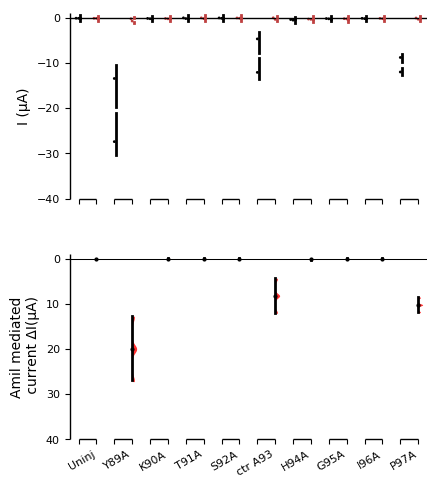

In [17]:
#plt.figure(figsize=(3.5, 3)) 
fig1= Fig_BeforeAfter_Alanin.mean_diff.plot(swarm_ylim=(-40,1), contrast_ylim=(40,-1), fig_size=(5.5, 6),  raw_marker_size=(2),es_marker_size=2,contrast_label='Amil mediated\n current ΔI(µA)',
                                    swarm_label='I (µA)',custom_palette=colorsBefAfter, reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75})#,reflines_kwargs


fig1.axes[0].plot([-1,50], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,1], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))


labels = ['','']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
# fig1.axes[0].text(0.13, -12.5, 'Ibu (µM)')
# fig1.axes[0].text(4.0, -12.5, 'Asp  (µM)')

labels2 = ['','Uninj']
for i in range(0,len(LabelAlanin)):
    labels2.append('')
    labels2.append(LabelAlanin[i])
                                                                                                       
#labels2 = ['',LabelAlanin[0],'','F84A','','K85A','','E86A','','F87A','','C88A','','Y89A','','K90A','','T91A','','S92A','','H94A','','G95A','','I96A','','P97A','','M98A','','I99A','','G100A']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')

#plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedirExportFig+"BeforeAfterPilotAlanin-WithOutCurrent"+'.pdf')


# plot alanin delta

/Users/wormsenselab/anaconda3/envs/dabest/lib/python3.7/site-packages/seaborn/categorical.py:1243: RuntimeWarning: invalid value encountered in sqrt
  dx = np.sqrt(d ** 2 - dy ** 2) * 1.05


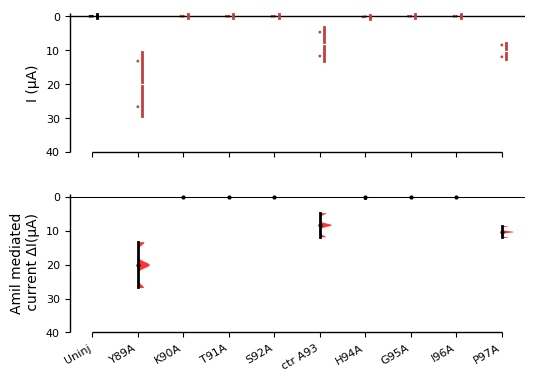

In [18]:
#plt.figure(figsize=(3.5, 3)) 
fig1= Fig_Delta_Alanin.mean_diff.plot(swarm_ylim=(40,-1), contrast_ylim=(40,-1), fig_size=(7, 4.5),  raw_marker_size=(2),es_marker_size=2,contrast_label='Amil mediated\n current ΔI(µA)',
                                    swarm_label='I (µA)',custom_palette=colorsDelta, reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75})#,reflines_kwargs


fig1.axes[0].plot([-1,50], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,1], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))


labels = ['','']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
# fig1.axes[0].text(0.13, -12.5, 'Ibu (µM)')
# fig1.axes[0].text(4.0, -12.5, 'Asp  (µM)')

labels2 = ['Uninj']
for i in range(0,len(LabelAlanin)):
    #labels2.append('')
    labels2.append(LabelAlanin[i])
                                                                                                       
#labels2 = ['',LabelAlanin[0],'','F84A','','K85A','','E86A','','F87A','','C88A','','Y89A','','K90A','','T91A','','S92A','','H94A','','G95A','','I96A','','P97A','','M98A','','I99A','','G100A']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')

#plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedirExportFig+"ChangeinCurrentPilotAlanin-WithOutCurrent"+'.pdf')


# plot chimera before and after

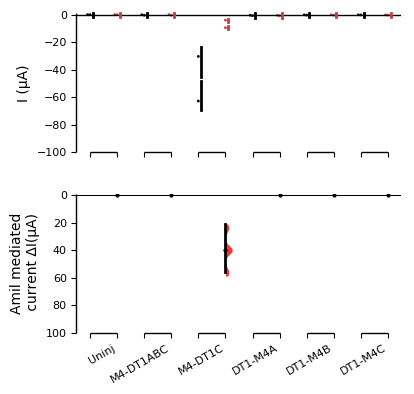

In [28]:
#plt.figure(figsize=(3.5, 3)) 
fig1= Fig_BeforeAfter_Chimera.mean_diff.plot(swarm_ylim=(-100,1), contrast_ylim=(100,-1), fig_size=(5, 4.5),  raw_marker_size=(2),es_marker_size=2,contrast_label='Amil mediated\n current ΔI(µA)',
                                    swarm_label='I (µA)',custom_palette=colorsBefAfter, reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75})#,reflines_kwargs


fig1.axes[0].plot([-1,50], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,1], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))


labels = ['','']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
# fig1.axes[0].text(0.13, -12.5, 'Ibu (µM)')
# fig1.axes[0].text(4.0, -12.5, 'Asp  (µM)')

labels2 = ['','Uninj']
for i in range(0,len(LabelChimera)):
    labels2.append('')
    labels2.append(LabelChimera[i])
                                                                                                       
#labels2 = ['',LabelAlanin[0],'','F84A','','K85A','','E86A','','F87A','','C88A','','Y89A','','K90A','','T91A','','S92A','','H94A','','G95A','','I96A','','P97A','','M98A','','I99A','','G100A']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')

#plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedirExportFig+"BeforeAndAfterPilotChimera"+'.pdf')


# plot chimera Delta

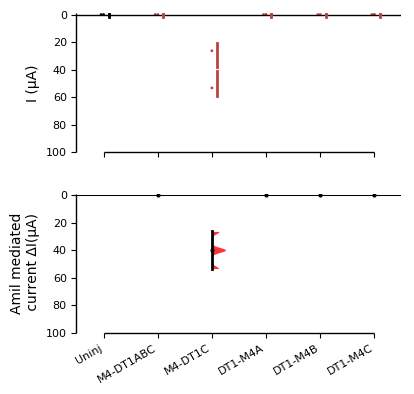

In [27]:
#plt.figure(figsize=(3.5, 3)) 
fig1= Fig_Delta_Chimera.mean_diff.plot(swarm_ylim=(100,-1), contrast_ylim=(100,-1), fig_size=(5, 4.5),  raw_marker_size=(2),es_marker_size=2,contrast_label='Amil mediated\n current ΔI(µA)',
                                    swarm_label='I (µA)',custom_palette=colorsDelta, reflines_kwargs = {'linestyle':'dashed', 'linewidth':0.75})#,reflines_kwargs


fig1.axes[0].plot([-1,50], [0,0], 'k-', color='#000000', linewidth=1)
#fig1.axes[1].plot([-1,20], [-1,-1], 'k--', color='#000000', linewidth=1)
fig1.axes[0].tick_params(axis='both', which='major', labelsize=8)  
fig1.axes[1].tick_params(axis='both', which='major', labelsize=8)  
#fig1 = plot([-1,1], [0,0])# , 'k--', color='#000000', linewidth=1)
#ax1.spines['left'].set_position(('outward',35))


labels = ['','']
fig1.axes[0].set_xticklabels(labels, rotation=30, ha='right')
# fig1.axes[0].text(0.13, -12.5, 'Ibu (µM)')
# fig1.axes[0].text(4.0, -12.5, 'Asp  (µM)')

labels2 = ['Uninj']
for i in range(0,len(LabelChimera)):
    #labels2.append('')
    labels2.append(LabelChimera[i])
                                                                                                       
#labels2 = ['',LabelAlanin[0],'','F84A','','K85A','','E86A','','F87A','','C88A','','Y89A','','K90A','','T91A','','S92A','','H94A','','G95A','','I96A','','P97A','','M98A','','I99A','','G100A']
fig1.axes[1].set_xticklabels(labels2, rotation=30, ha='right')

#plt.gcf().subplots_adjust(bottom=0.2, left=0.3,right=None, top=None,hspace=1.5, wspace=0.2) 
plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 
plt.savefig(filedirExportFig+"ChangeinCurrentPilotChimera"+'.pdf')
